In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    return(x*x*x - 6*x*x + 4)

Fibonacci_search: 
 x* = 3.966435697843907, f(x*) = -27.99327843800475, a = 3.875523891304353, b = 4.057347504383461, Interval = 0.1 



Text(4.1, -27, 'minimum')

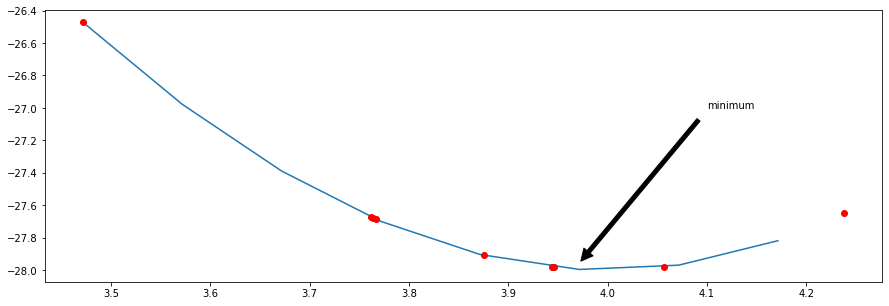

In [4]:
def fibi(n):
    if n <= 1:
        return(1)
    else:
        return(fibi(n-2) + fibi(n-1))

def fibonacci_search(left_edge, right_edge, t_interval, dif):
    X_list, FX_list = ([] for i in range(2))
    interval = math.fabs(right_edge - left_edge)
    fib = [1]
    index = 1
    step = 0
    while fib[len(fib) - 1] < interval / t_interval:
        fib.append(fibi(index))
        index += 1
    while step != index - 3:
        left = left_edge + fib[len(fib) - 1 - 2] / fib[len(fib) - 1]*(right_edge - left_edge)
        right = left_edge + fib[len(fib) - 1 - 1] / fib[len(fib) - 1]*(right_edge - left_edge)
        X_list.extend([left, right])
        FX_list.extend([function(left), function(right)])
        if function(left) <= function(right):
            right_edge = right
            right = left
            left = left_edge + fib[len(fib) - 1 - step - 3] / fib[len(fib) - 1 - step - 1]*(right_edge - left_edge)
        elif function(left) > function(right):
            left_edge = left
            left = right
            right = left_edge + fib[len(fib) - 1 - step - 2] / fib[len(fib) - 1 - step - 1]*(right_edge - left_edge)
        step += 1
    right  = left + dif
    #if f(left) <= f(right):
    #    right_edge = right
    #elif f(left) > f(right):
    #    left_edge = left
    x_point = (left_edge + right_edge)/2
    fx_point = function((left_edge + right_edge)/2)
    print("Fibonacci_search: \n x* = {0}, f(x*) = {1}, a = {2}, b = {3}, Interval = {4} \n".format(x_point,
                                                                                                   fx_point,
                                                                                                   left_edge,
                                                                                                   right_edge,
                                                                                                   t_interval))    
    return(X_list, FX_list, x_point, fx_point)
    
X_list, FX_list, x_point, fx_point = fibonacci_search(3, 5, 0.1, 0.1)

g_x = np.arange(min(X_list), max(X_list), 0.1)
g_y = [function(i) for i in g_x]

fig, ax = plt.subplots(figsize=(15, 5))   
ax.plot(g_x, g_y)
ax.plot(X_list, FX_list, 'ro')
ax.annotate('minimum', xy=(x_point, fx_point), xytext=(4.1, -27),
                   arrowprops=dict(facecolor='black', shrink=0.05))
#plt.savefig('path.png', dpi=300)